In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from netgraph import Graph

import numpy as np
import pandas as pd

# Clustering Coefficients

**Triad closure:** Tendency for people sharing connectings in a social network to become connected

Used for Edge prediction: edges that close triangles are likely to appear in a future time step mbut how about untimed or static networks?)

**Local clustering coefficient (of a node) / LLC:** Fraction of pairs of the node's friends that are friends with each other 

= # of pairs of C's friends who are friends / # of pairs of C's friends

In [3]:
G = nx.Graph()

G.add_edges_from([('A', 'K'), ('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'K'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('E', 'F'), ('E', 'H'), ('F', 'G'), ('I', 'J')])

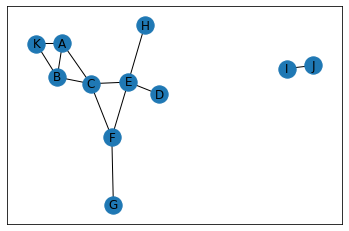

In [4]:
nx.draw_networkx(G)

Use `nx.clustering` to compute a node's local clustering coefficient

In [5]:
nx.clustering(G, 'F'), nx.clustering(G, 'E'), nx.clustering(G, 'A'), nx.clustering(G, 'I')

(0.3333333333333333, 0.16666666666666666, 0.6666666666666666, 0)

Measuring clustering over a network:
* Averaging the local clustering coefficient of each node
* Counting the percentage of "open triads" in the network (3 nodes that have two edges among them)

**Transitivity**: 3 * number of closed triads / number of open triads

In [6]:
nx.transitivity(G)

0.4090909090909091

<div class="alert alert-info">
Both Transitivity and Average Clustering Coefficient measure the tendency for edges to form triangles. Transitivity weighs nodes with large degress higher
</div>

<img src='img/transitivity_vs_acc.png'>

# Distance 

## Distance between nodes

- Path: a sequence of nodes connected by an edge (length of a path = number of edges)
- Distance between two nodes = shortest path between 2 nodes

In [7]:
nx.shortest_path(G, 'D', 'K')

['D', 'E', 'C', 'A', 'K']

In [8]:
nx.shortest_path_length(G, 'D', 'K')

4

- Distance from one node to all nodes: BFS!

In [9]:
T = nx.bfs_tree(G, 'A')
T

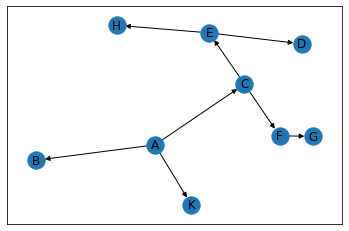

In [10]:
nx.draw_networkx(T)

In [11]:
nx.shortest_path_length(G, 'D')

{'D': 0, 'E': 1, 'H': 2, 'C': 2, 'F': 2, 'G': 3, 'B': 3, 'A': 3, 'K': 4}

## Distance to measure Graph Connectivity

In [12]:
nx.average_shortest_path_length(G)

NetworkXError: Graph is not connected.

**Periphery :** nodes that have eccentricity == diameter

**Center :** nodes that have eccentricity == radius

**Diameter :** maximum distance in the graph

**Radius :** minimum distance in the graph

**Eccentricity :** Length of the longest short path starting from a node

In [13]:
G.add_edge('G', 'I')

In [14]:
nx.average_shortest_path_length(G)

2.672727272727273

### Eccentricity

In [15]:
nx.diameter(G)

6

In [16]:
nx.radius(G)

3

In [17]:
nx.eccentricity(G, 'A') 

5

In [18]:
nx.eccentricity(G)

{'A': 5,
 'K': 6,
 'B': 5,
 'C': 4,
 'E': 4,
 'F': 3,
 'D': 5,
 'H': 5,
 'G': 4,
 'I': 5,
 'J': 6}

In [19]:
nx.periphery(G)

['K', 'J']

In [20]:
nx.center(G)

['F']

## Example: Karate Club

In [21]:
K = nx.karate_club_graph()
K = nx.convert_node_labels_to_integers(K, first_label=1)

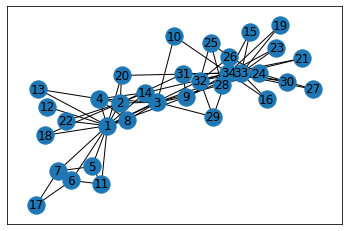

In [22]:
nx.draw_networkx(K)

In [23]:
nx.diameter(K), nx.radius(K), nx.average_shortest_path_length(K)

(5, 3, 2.408199643493761)

In [24]:
nx.center(K)

[1, 2, 3, 4, 9, 14, 20, 32]

In [25]:
nx.periphery(K)

[15, 16, 17, 19, 21, 23, 24, 27, 30]

# Connected Components

* Connected Graph = Any two nodes in the graph are connected by a path
* Connected component = Set of nodes such that: every node has a path to every other node in the set, and no external node to the set has a path to the set
* If the graph/component is directed:
  * Strongly connected: for every pair of nodes, there is a directed path from each one of them to the other
  * Weakly connected: if replacing all directed edges with undirected edges yields to an connected component

In [26]:
nx.is_connected(G) # is_strongly_connected or is_weakly_connected if the graph is directed

True

In [27]:
nx.number_connected_components(G)

1

In [28]:
sorted(nx.connected_components(G))

[{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'}]

In [29]:
 nx.node_connected_component(G, 'G')

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'}

# Robustness

Ability of a network to maintain its general structural properties when it faces failures or attacks (removal of nodes or edges) (e.g. server in a data center, road in a map, power line failure, airport closure..)

Keeping connectivity = Good robustness

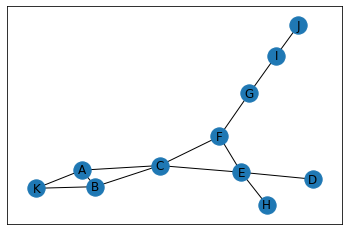

In [37]:
nx.draw_networkx(G)

In [30]:
nx.node_connectivity(G) # minimum number of nodes to be removed for the network to become disconnected

1

In [32]:
nx.minimum_node_cut(G) 

{'C'}

In [33]:
nx.edge_connectivity(G) # minimum number of edges to be removed for the network to become disconnected

1

In [35]:
nx.minimum_edge_cut(G)

{('G', 'F')}

## Disrupting connection in network

In [41]:
list(nx.all_simple_paths(G, 'G', 'K'))

[['G', 'F', 'C', 'A', 'K'],
 ['G', 'F', 'C', 'A', 'B', 'K'],
 ['G', 'F', 'C', 'B', 'A', 'K'],
 ['G', 'F', 'C', 'B', 'K'],
 ['G', 'F', 'E', 'C', 'A', 'K'],
 ['G', 'F', 'E', 'C', 'A', 'B', 'K'],
 ['G', 'F', 'E', 'C', 'B', 'A', 'K'],
 ['G', 'F', 'E', 'C', 'B', 'K']]

In [44]:
nx.node_connectivity(G, 'G', 'K')

1

In [45]:
nx.minimum_node_cut(G, 'G', 'K')

{'C'}

In [47]:
nx.minimum_node_cut(G, 'C', 'K')

{'A', 'B'}

In [49]:
nx.minimum_edge_cut(G, 'C', 'K')

{('A', 'K'), ('B', 'K')}

<div class="alert alert-info">
Graphs with large node and edge connectivity are more robust to the loss of nodes and edges (which, in many applications, is a desirable property to have).</div>